In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
X = pd.read_csv("CarPrice_Assignment.csv")

In [17]:
#Preprocessing
X.drop(['car_ID'], axis=1, inplace=True)
X["doornumber"] = X["doornumber"].replace("four",4).replace("two",2)
X["cylindernumber"] = X["cylindernumber"].replace({"four": 4, "five": 5, "six": 6, "three": 3, "twelve": 12, "two": 2, "eight": 8})
X['fueltype'] = X['fueltype'].replace({'gas': 0, 'diesel': 1})
X['aspiration'] = X['aspiration'].replace({'std': 0, 'turbo': 1})
X['carbody'] = X['carbody'].replace({'convertible': 0, 'hardtop': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4})
X['drivewheel'] = X['drivewheel'].replace({'4wd': 0, 'fwd': 1, 'rwd': 2})
X['enginelocation'] = X['enginelocation'].replace({'front': 0, 'rear': 1})
X['enginetype'] = X['enginetype'].replace({'dohc': 0, 'dohcv': 1, 'l': 2, 'ohc': 3, 'ohcf': 4, 'ohcv': 5, 'rotor': 6})
X['fuelsystem'] = X['fuelsystem'].replace({'1bbl': 0, '2bbl': 1, '4bbl': 2, 'idi': 3, 'mfi': 4, 'mpfi': 5, 'spdi': 6, 'spfi': 7})

unique_values = X['CarName'].unique()
label_mapping = {value: idx for idx, value in enumerate(unique_values)}
X['CarName'] = X['CarName'].map(label_mapping)

X = X.astype(float)

In [18]:
# Normalizing the features
X = (X - X.mean(axis=0)) / X.std(axis=0)

X = X[(X.abs() <= 3).all(axis=1)]
X = X.fillna(X.mean())

In [19]:
correlation_matrix = X.corr()
mat = pd.DataFrame(correlation_matrix['price'])
print(mat)

                     price
symboling        -0.073726
CarName          -0.065285
fueltype               NaN
aspiration        0.276374
doornumber        0.151739
carbody           0.138328
drivewheel        0.504079
enginelocation         NaN
wheelbase         0.672558
carlength         0.730699
carwidth          0.768117
carheight         0.216060
curbweight        0.831836
enginetype       -0.047922
cylindernumber    0.516096
enginesize        0.753878
fuelsystem        0.643224
boreratio         0.502915
stroke            0.081291
compressionratio -0.287257
horsepower        0.816048
peakrpm           0.060661
citympg          -0.773668
highwaympg       -0.763891
price             1.000000


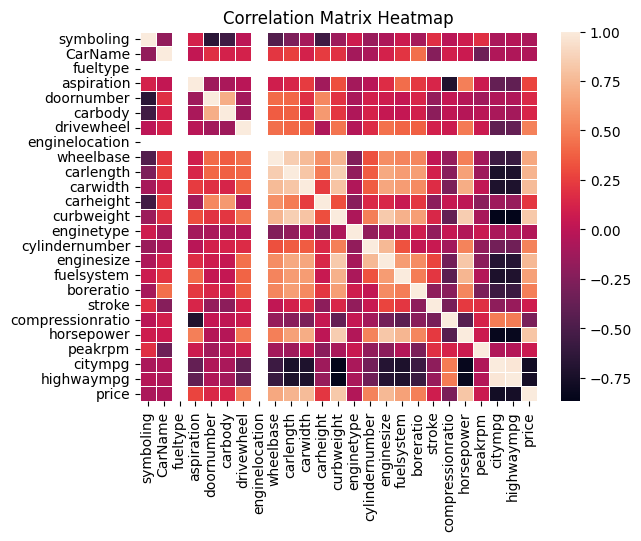

In [20]:
sns.heatmap(correlation_matrix, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [21]:
y = X['price']
y = y.values.reshape(-1, 1)

X.drop(['price','symboling','fueltype','enginelocation','enginetype','peakrpm'], axis=1, inplace=True)
X = np.hstack((X ,np.ones((X.shape[0],1))))

In [22]:
def gradient_descent(X, y, weights, alpha, iterations):
    m = len(X)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = np.dot(X, weights)
        error = predictions - y
        gradient = (1/m) * np.dot(X.T, error)
        weights -= alpha * gradient
        cost_history[i] = (1/(2*m)) * np.dot(error.T, error)
        if np.isnan(cost_history[i]):
            print(f"NaN encountered at iteration {i}")
            break
    
    return weights, cost_history

In [23]:
def linear_regression(X, y, alpha, iterations):
    weights = np.zeros((X.shape[1], 1))
    weights, cost_history = gradient_descent(X, y, weights, alpha, iterations)
    
    return weights, cost_history

In [24]:
#Train Test Split
ratio = 0.8

rows = X.shape[0]
train_size = int(ratio*rows)

X_train = X[0:train_size]
X_test = X[train_size:]

y_train = y[0:train_size]
y_test = y[train_size:]

In [25]:
alpha = 0.03
iterations = 150

weights, cost_history = linear_regression(X_train, y_train, alpha, iterations)

# print("Optimized theta parameters:", weights)
print("Final cost:", round(cost_history[-1],10))

Final cost: 0.034218919


C:\Users\Dishita\AppData\Local\Temp\ipykernel_11916\677469361.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_history[i] = (1/(2*m)) * np.dot(error.T, error)


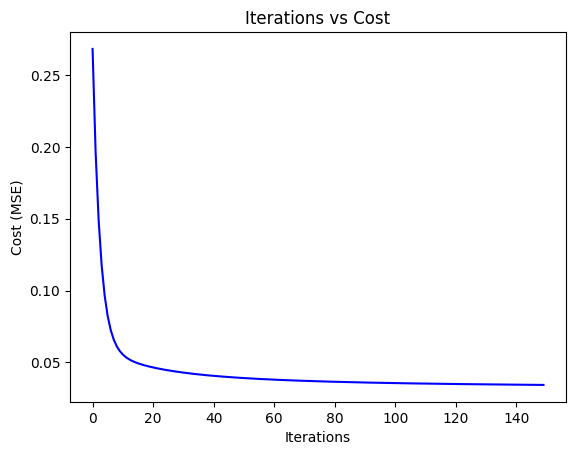

In [26]:
# Plotting the iterations vs cost
plt.plot(range(iterations), cost_history, 'b-')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Iterations vs Cost")
plt.show()

In [27]:
def accuracy(X_test, y_test, weights):
    y_pred = np.dot(X_test, weights)
    rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
    mae = np.mean(np.abs(y_test - y_pred))
    
    ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
    ss_res = np.sum((y_test - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_total)
    
    return rmse, mae, r_squared

mse, mae, r_squared = accuracy(X_test, y_test, weights)
print("MSE:", mse)
print("MAE:", mae)
print("R-squared:", r_squared)


MSE: 0.2715489981709576
MAE: 0.21619340577664364
R-squared: 0.7258418767507783


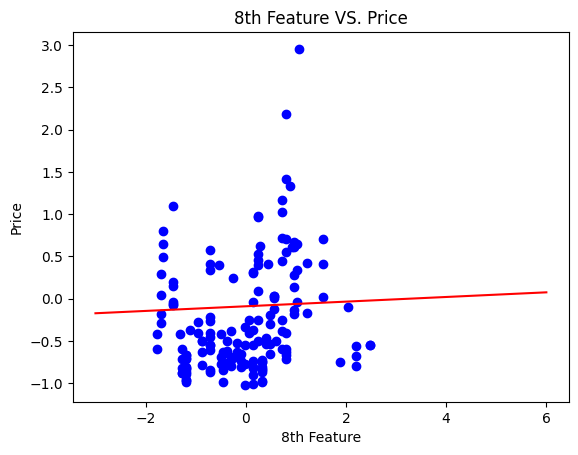

In [28]:
# Plotting feature vs. price graph for 8th feature
x_axis = np.arange(-3,7)
y_axis = weights[8] * x_axis + weights[-1]
plt.scatter(X[:,8],y, c='b')
plt.plot(x_axis,y_axis, color = "red")
plt.xlabel("8th Feature")
plt.ylabel("Price")
plt.title("8th Feature VS. Price")
plt.show()